In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
deliveries_dataset = pd.read_csv('Ipl Data/deliveries.csv')
matches_dataset=pd.read_csv("Ipl Data/matches.csv")


In [3]:
deliveries_dataset['inning'].unique()

array([1, 2, 3, 4, 5])

In [4]:
matches_dataset['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
#Data Preprocessing

deliveries_dataset=deliveries_dataset.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries_dataset=deliveries_dataset.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries_dataset=deliveries_dataset.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

matches = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries_dataset['match_id'].unique():
    for innings in deliveries_dataset[ deliveries_dataset['match_id']==match_no ]['inning'].unique():
        df = deliveries_dataset[
                        (deliveries_dataset['match_id']==match_no) &
                        (deliveries_dataset['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [9]:
#Final Dataset after preprocessing

df1 = pd.DataFrame()
df1['match_id'] = matches
df1['total_runs'] = runs
df1['season'] = [matches_dataset[ matches_dataset['id']==i ]['season'].unique()[0] for i in matches] 
df1['batting_team'] = batting_team


df1

,match_id,total_runs,season,batting_team
0,1,207,2017,Sunrisers Hyderabad
1,1,172,2017,Royal Challengers Bangalore
2,2,184,2017,Mumbai Indians
3,2,187,2017,Rising Pune Supergiants
4,3,183,2017,Gujarat Lions
...,...,...,...,...
1523,11413,170,2019,Delhi Capitals
1524,11414,155,2019,Delhi Capitals
1525,11414,162,2019,Chennai Super Kings
1526,11415,152,2019,Mumbai Indians


In [11]:
#Maximum score in each season

season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)



In [25]:
max_runs

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

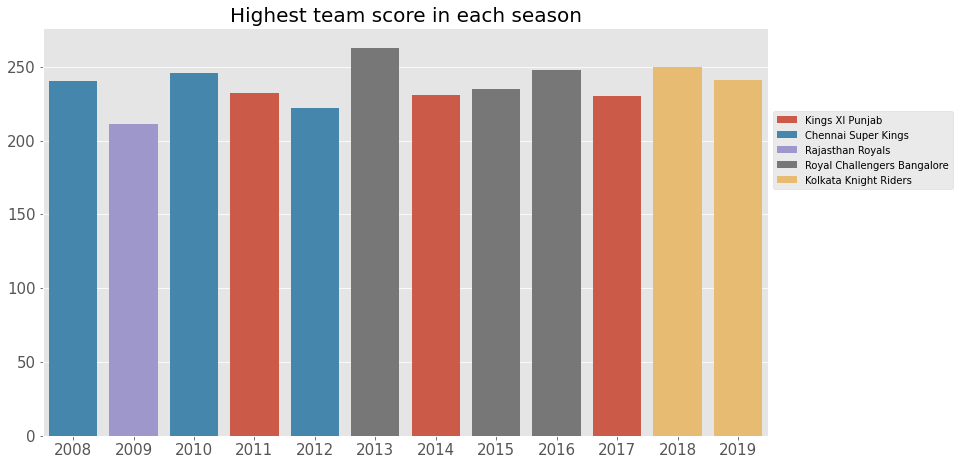

In [26]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))
